<a href="https://colab.research.google.com/github/Bart-Weil/Genetic-Algorithm-for-Numerical-Optimisation/blob/main/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import time
import matplotlib.pyplot as plt

start_time = time.time()

crossoverprop = 0.05
mutprob = 1
numpop = 100

convergence = 20
elitism = 3

Gensigma = 20
Genalpha = 2

mu = 50
sigma = 25

print('Select number of generations:')
gennum = int(input())
print('Select Target')
optimum = int(input())

pop = []
stag = []
best = []

pop_plot = []

for i in range(0, numpop):
    pop.append(random.gauss(mu, sigma))
    stag.append(0)


# crossover

def rand(num1, num2):
    return random.uniform(num1, num2)


def geomean(num1, num2):
    if (num1 * num2) < 0:
        return -(abs(num1 * num2) ** 0.5)
    else:
        return (num1 * num2) ** 0.5


def mean(num1, num2):
    return (num1 + num2) / 2


# mutation

def addmut(num):
    return num + random.gauss(0, 20)


def divmut(num):
    return num / abs(random.gauss(0, 10))


def multmut(num):
    return num * abs(random.gauss(0, 10))


def expmut(num):
    exp = random.gauss(1, 0.5)
    if num < 0:
        return -(abs(num)) ** exp
    else:
        return num ** exp


crossops = [rand, geomean, mean]
mutops = [addmut, divmut, multmut, expmut]


# fitness

def OptFuction(target, num):
    return (target-num)**2

# fitness sharing

def Share(Ind1, Ind2, alpha, sigma):
  if (Ind1-Ind2)**2 <= sigma:
    return (1-(Ind1-Ind2)**2)**alpha
  else:
    return 0
  
def FitShare(population, fitlist):
  for individual1 in range(len(population)):
    shfitsum = []
    for individual2 in range(len(population)):
      shfitsum.append(Share(individual1, individual2, Genalpha, Gensigma))
      
    fitlist[population.index(individual1)] = sum(shfitsum)

for generation in range(gennum):
    
    print(f'Running Generation {generation + 1}')
    fitness = []
    rankedfit = []
    crossover = []

    for member in pop:
      fitness.append(OptFuction(optimum, member))

    for stagnation in range(len(stag)):
      stag[stagnation] += 1

    rankedfit = sorted(fitness)

    for mutsubj in range(len(pop)):
        if random.uniform(0, 1) < mutprob:
            if random.uniform(0, 1) < (rankedfit[rankedfit.index(fitness[mutsubj])])/(max(rankedfit)) ** elitism:
                prev = pop[mutsubj]
                pop[mutsubj] = random.choice(mutops)(pop[mutsubj])
                if OptFuction(optimum, pop[mutsubj]) < OptFuction(optimum, prev):
                    stag[pop.index(pop[mutsubj])] = 0

    if (len(rankedfit) * crossoverprop) % 1 != 0:
        if math.floor(len(rankedfit) * crossoverprop) % 2 == 0:
            crossover.extend(rankedfit[0:math.floor(len(rankedfit) * crossoverprop)])
        else:
            crossover.extend(rankedfit[0:math.ceil(len(rankedfit) * crossoverprop)])
    else:
        if len(rankedfit) * crossoverprop * crossoverprop % 2 == 0:
            crossover.extend(rankedfit[0:int(len(rankedfit) * crossoverprop)])
        else:
            crossover.extend(rankedfit[0:int(len(rankedfit) * crossoverprop + 1)])

    crosstemp = crossover
    crossover = []

    for fit in crosstemp:
        crossover.append(pop[fitness.index(fit)])

    random.shuffle(crossover)

    crosstemp = crossover
    crossover = []

    ind = 0
    while ind <= len(crosstemp) - 2:
        crossover.append(crosstemp[ind:ind + 2])
        ind += 2

    for couple in crossover:
        pop.append(random.choice(crossops)(couple[0], couple[1]))
        stag.append(0)
        stag[pop.index(couple[0])] = 0
        stag[pop.index(couple[1])] = 0

    stagtemp = stag

    for stagnation in range(len(stagtemp)):

        if stagtemp[stagnation] >= stagmax:
            #print(f'Individual {pop[stag.index(stagnation)]} with stagnation {stagnation} went extinct')
            pop.pop(stagnation)
            stag.pop(stagnation)
            fitness.pop(stagnation)

            print('pop')

    if len(pop)==0:
      print('Population has gone extinct.')
      quit()

    fitness = []

    for member in pop:
        fitness.append(OptFuction(optimum, member))

    print(len(fitness))
    print(len(pop))

    best.append(pop[fitness.index(min(fitness))])

    if len(set(best[len(best) - convergence:])) == 1 and generation > convergence:
        print(best)
        print(f'Convergence threshold of {convergence} reached, terminating.')
        break

    pop_plot.append(pop)

    print(f'Best Individual: {pop[fitness.index(min(fitness))]} out of a popultation of {len(pop)}')



Select number of generations:
50
Select Target
17
Running Generation 1
103
103
Best Individual: 17.07532276322818 out of a popultation of 103
Running Generation 2
106
106
Best Individual: 17.07532276322818 out of a popultation of 106
Running Generation 3
109
109
Best Individual: 17.07532276322818 out of a popultation of 109
Running Generation 4
112
112
Best Individual: 16.926444026607676 out of a popultation of 112
Running Generation 5
115
115
Best Individual: 16.926444026607676 out of a popultation of 115
Running Generation 6
118
118
Best Individual: 16.926444026607676 out of a popultation of 118
Running Generation 7
121
121
Best Individual: 16.973264503222072 out of a popultation of 121
Running Generation 8
124
124
Best Individual: 16.989771421746635 out of a popultation of 124
Running Generation 9
127
127
Best Individual: 17.000177828280975 out of a popultation of 127
Running Generation 10
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
pop
po

IndexError: ignored

In [ ]:
import random
import math
import time

start_time = time.time()

crossoverprop = 0.05
mutprob = 0.2
numpop = 1000
stagmax = 10
convergence = 10
elitism = 2
geneticDist = 0

mu = 50
sigma = 25

print('Select number of generations:')
gennum = int(input())
print('Select Target')
optimum = int(input())

pop = []
stag = []
best = []

pop_plot = []

for i in range(0, numpop):
    pop.append(random.gauss(mu, sigma))
    stag.append(0)


# crossover

def rand(num1, num2):
    return random.uniform(num1, num2)


def geomean(num1, num2):
    if (num1 * num2) < 0:
        return -(abs(num1 * num2) ** 0.5)
    else:
        return (num1 * num2) ** 0.5


def mean(num1, num2):
    return (num1 + num2) / 2


# mutation

def addmut(num):
    return num + random.gauss(0, 20)


def divmut(num):
    return num / abs(random.gauss(0, 10))


def multmut(num):
    return num * abs(random.gauss(0, 10))


def expmut(num):
    exp = random.gauss(1, 0.5)
    if num < 0:
        return -(abs(num)) ** exp
    else:
        return num ** exp


crossops = [rand, geomean, mean]
mutops = [addmut, divmut, multmut, expmut]


# fitness

def OptFuction(target, num):
    return (target-num)**2

def Share(Ind1, Ind2, alpha, sigma):
  if (Ind1-Ind2)**2 <= sigma:
    return (1-(Ind1-Ind2)**2)**alpha
  else:
    return 0

def FitShare(population, fitlist):
  for individual1 in range(len(population) ):
    shfitsum = []
    for individual2 in range(len(population) ):
      shfitsum.append(Share(individual1, individual2, Genalpha, Gensigma) )
      
    fitlist [population.index(individual1)] = sum(shfitsum)

for generation in range(gennum):
    print(f'Running Generation {generation + 1}')
    fitness = []
    rankedfit = []
    crossover = []

    prevlen = len(pop)

    for member in pop:
        fitness.append(OptFuction(optimum, member))

    for stagnation in range(len(stag)):
        stag[stagnation] += 1

    rankedfit = sorted(fitness)

    for mutsubj in range(len(pop)):
        if random.uniform(0, 1) < mutprob:
            if random.uniform(0, 1) < (rankedfit[rankedfit.index(fitness[mutsubj])]) ** elitism:
                prev = pop[mutsubj]
                pop[mutsubj] = random.choice(mutops)(pop[mutsubj])
                if OptFuction(optimum, pop[mutsubj]) < OptFuction(optimum, prev):
                    stag[pop.index(pop[mutsubj])] = 0

    if (len(rankedfit) * crossoverprop) % 1 != 0:
        if math.floor(len(rankedfit) * crossoverprop) % 2 == 0:
            crossover.extend(rankedfit[0:math.floor(len(rankedfit) * crossoverprop)])
        else:
            crossover.extend(rankedfit[0:math.ceil(len(rankedfit) * crossoverprop)])
    else:
        if len(rankedfit) * crossoverprop * crossoverprop % 2 == 0:
            crossover.extend(rankedfit[0:int(len(rankedfit) * crossoverprop)])
        else:
            crossover.extend(rankedfit[0:int(len(rankedfit) * crossoverprop + 1)])

    crosstemp = crossover
    crossover = []

    for fit in crosstemp:
        crossover.append(pop[fitness.index(fit)])

    random.shuffle(crossover)

    crosstemp = crossover
    crossover = []

    ind = 0
    while ind <= len(crosstemp) - 2:
        crossover.append(crosstemp[ind:ind + 2])
        ind += 2

    for couple in crossover:
        pop.append(random.choice(crossops)(couple[0], couple[1]))
        stag.append(0)
        stag[pop.index(couple[0])] = 0
        stag[pop.index(couple[1])] = 0

    poptemp = []
    fittemp = []
    stagtemp = []

    for newmember in pop[prevlen:]:

        fitness.append(OptFuction(optimum, newmember))

    print(len(pop))
    print(len(fitness))
    print(len(stag))

    for stagnation in range(len(stag)):

        if stag[stagnation] < stagmax:
            def Share(Ind1, Ind2, alpha, sigma):
if (Ind1-Ind2)**2 <= sigma:
return (1-(Ind1-Ind2)**2)*xalpha
else:
return @
def FitShare(population, fitlist):
for individuall in range(len(population) ):
shfitsum = []
for individual2 in range(len(population) ):
shfitsum.append(Share(individual1, individual2, Genalpha, Gensigma) )
fitlist [population. index(individuall)] = sum(shfitsum)
            poptemp.append(pop[stagnation])
            stagtemp.append(stag[stagnation])
            fittemp.append(fitness[stagnation])
        
        else:
          print(f'Infividual {pop[stagnation]} with stagnation {stag[stagnation]} went extinct.')

    stag = stagtemp
    fitness = fittemp
    pop = poptemp

    print(pop)

    fitness = []

    for member in pop:
        fitness.append(OptFuction(optimum, member))

    best.append(pop[fitness.index(min(fitness))])

    if len(set(best[len(best) - convergence:])) == 1 and generation > convergence:
        print(best)
        print(f'Convergence threshold of {convergence} reached, terminating.')
        break

    pop_plot.append(pop)

    print(f'Best Individual: {pop[fitness.index(min(fitness))]} out of a popultation of {len(pop)}')

Select number of generations:
50
Select Target
17
Running Generation 1
1025
1025
1025
[44.87777901976609, 88.29178450412772, 70.01383156598007, 34.83930817403055, 66.46286305352746, 93.86917998842371, 100.19861397801432, 82.62863409392295, 34.47932567950407, 38.240289923129396, 33.9939982137772, 85.98459762113501, 3.212844694507989, 37.46342128352916, 42.54925638712296, 68.6996735764774, 121.59181631417192, 22.4729146861404, -2.804558133202697, 88.26893872762462, 19.623270714601926, 286.47206728603123, 33.872936218624865, 28.024857207369973, 33.75391451537054, 51.84874402784993, 21.05496121517042, 44.893204501331276, 60.99060713936866, 20.214303052661037, 67.8969660854538, 47.60448509374442, 40.55661032758183, 79.08861796938875, 70.07629554650322, 38.30945912166297, 38.72738179900941, 13.297260817454983, 1.9245473106254352, 377.5802440876382, 2.943137933840951, 24.384733165723166, 3.694797985185128, 43.057151974470635, 42.76678490443988, 75.77654153869793, 61.853147547640724, 69.345301

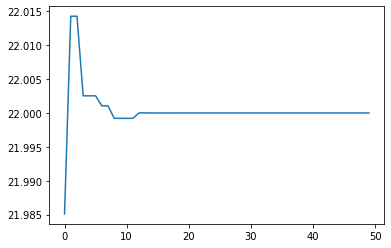

In [ ]:
import matplotlib.pyplot as plt
plt.plot(best)

In [ ]:
print(pop_plot)

[[6.407118979195175, 192.9989747525423, 4260.643496710627, 176.73564812219024, -34.918754495071745, -21.84968577050919, 0.99785062536594, 8.662321718424822, 105.48174784087148, 36.066852134366016, 11182.142248212554, 4798.7193526300925, 16.206474079050125, 0.11463744777364192, 40524.46210953968, 8.218873375932086, -0.009874000486798573, 148.41992845937148, 1.1498392079217767, -0.024692318666543932, 179.85100228509822, 4.30058938983692, 117.36060892737542, 4060.0340113529924, 104.08956543075554, 149.4548042972411, 278.795796901347, 704.1041488158173, 169.71925725245916, 84.85039988611533, 49.880635224151035, 2.5984599102276733, 243.28493124890488, 49.996368215857736, 162802504.15116134, 1899.6619512947211, 777043.1961975243, 1965.916369723265, 5859.052676487217, 499.52760436962035, 27716.80674085218, 869.7076477881849, 500.3849190680089, 500.2208107897198, 499.62792786700186, 722.4878406022908, 0.15277501442797028, 0.30885495317997513, 6.979805900910927, 3008.1586906187986, 499.98136727

In [ ]:
import numpy as np
pop_plot_T = np.array(pop_plot).T.tolist()

In [ ]:
print(pop_plot_T)

[[14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292, 14.437242805105292

In [ ]:
for i in range(len(pop_plot_T)):
  pop_plot_T[i] = set(pop_plot_T[i])

print(pop_plot_T)

[{6.407118979195175}, {192.9989747525423}, {4260.643496710627}, {176.73564812219024}, {-34.918754495071745}, {-21.84968577050919}, {0.99785062536594}, {8.662321718424822}, {105.48174784087148}, {36.066852134366016}, {11182.142248212554}, {4798.7193526300925}, {16.206474079050125}, {0.11463744777364192}, {40524.46210953968}, {8.218873375932086}, {-0.009874000486798573}, {148.41992845937148}, {1.1498392079217767}, {-0.024692318666543932}, {179.85100228509822}, {4.30058938983692}, {117.36060892737542}, {4060.0340113529924}, {104.08956543075554}, {149.4548042972411}, {278.795796901347}, {704.1041488158173}, {169.71925725245916}, {84.85039988611533}, {49.880635224151035}, {2.5984599102276733}, {243.28493124890488}, {49.996368215857736}, {162802504.15116134}, {1899.6619512947211}, {777043.1961975243}, {1965.916369723265}, {5859.052676487217}, {499.52760436962035}, {27716.80674085218}, {869.7076477881849}, {500.3849190680089}, {500.2208107897198}, {499.62792786700186}, {722.4878406022908}, {0

In [ ]:
for i in pop_plot_T[2]:
  print(i)

0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856
0.17248234474098856


<function matplotlib.pyplot.show>

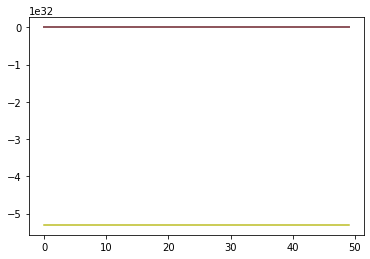

In [ ]:
for i in range(len(pop_plot_T)):
  plt.plot(pop_plot_T[i])

plt.show

In [ ]:
lista = [1,2,3,4,5,6,7,8,9]

templista = lista

for i in templista:
  if i>5:
    lista.pop(templista.index(i))

print(lista)

[1, 2, 3, 4, 5, 7, 9]
